In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic_df=pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
survived_df=titanic_df[titanic_df['Survived']==1]
print(f"surviaval = {np.round(((len(survived_df)/len(titanic_df))*100),2)}%")

surviaval = 38.38%


<Axes: xlabel='Pclass', ylabel='count'>

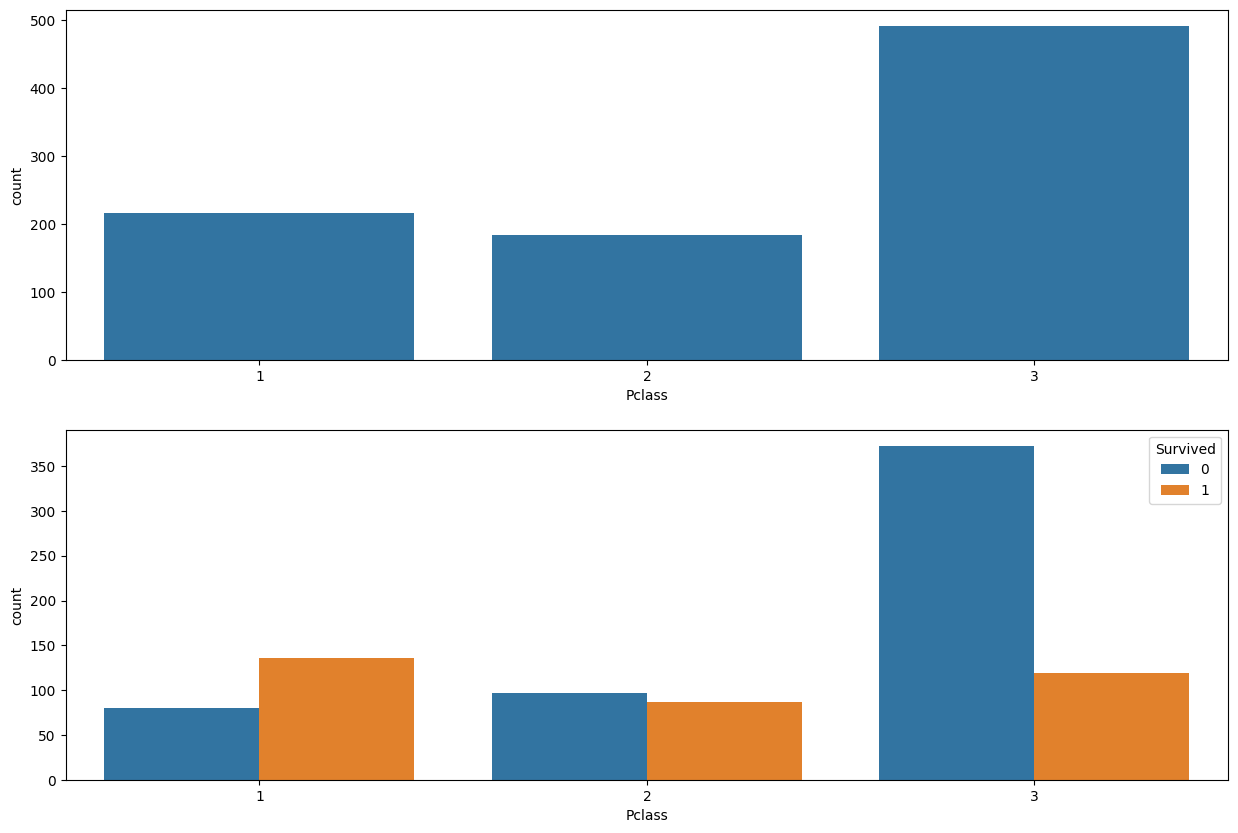

In [ ]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.countplot(x='Pclass',data=titanic_df)

plt.subplot(212)
sns.countplot(x='Pclass',hue='Survived',data=titanic_df)

<Axes: xlabel='SibSp', ylabel='count'>

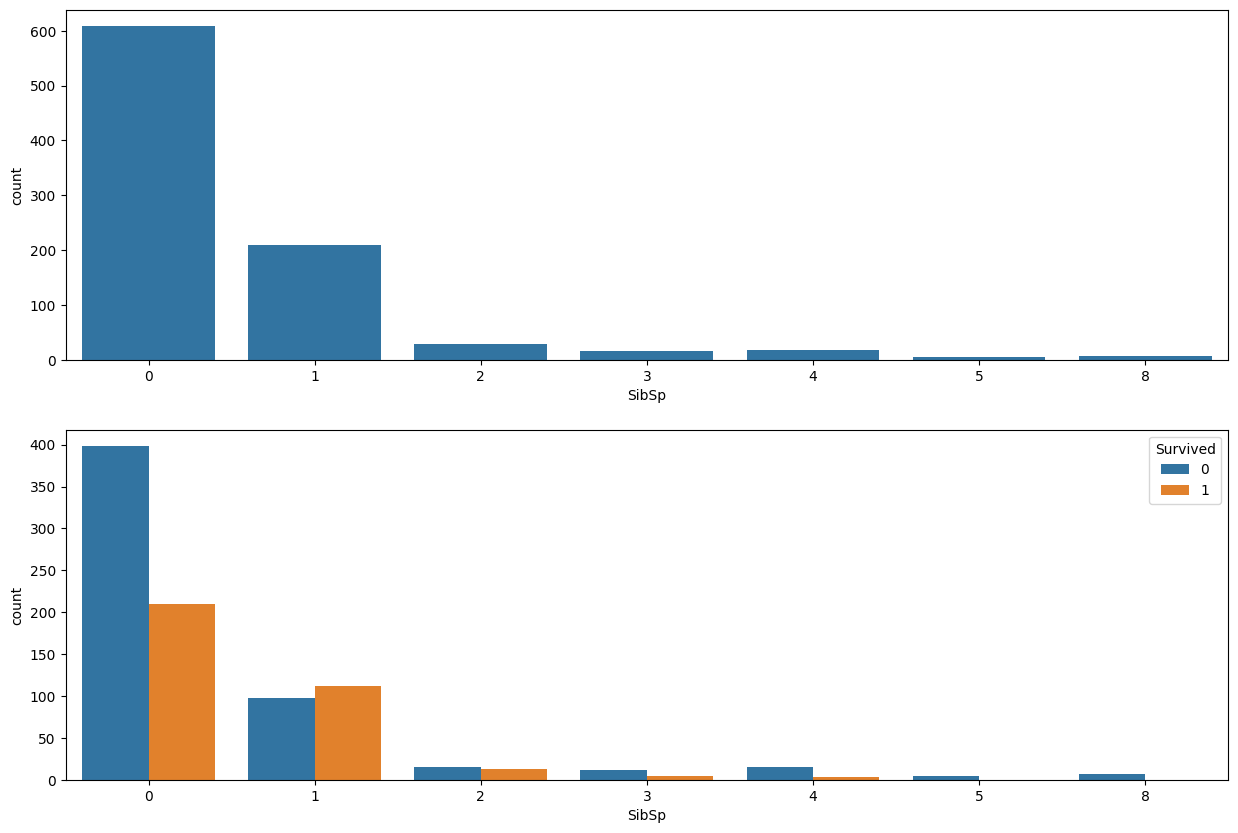

In [ ]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.countplot(x='SibSp',data=titanic_df)

plt.subplot(212)
sns.countplot(x='SibSp',hue='Survived',data=titanic_df)

<Axes: xlabel='Parch', ylabel='count'>

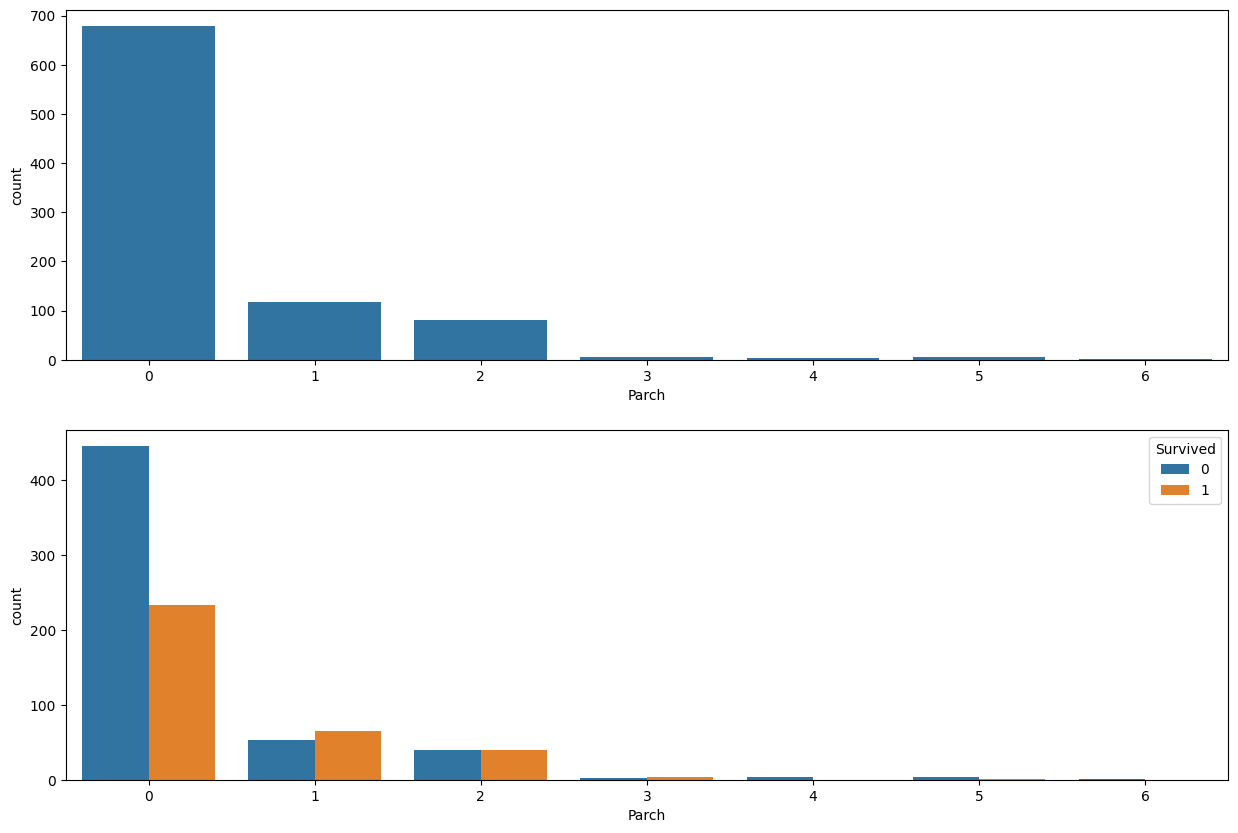

In [ ]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.countplot(x='Parch',data=titanic_df)

plt.subplot(212)
sns.countplot(x='Parch',hue='Survived',data=titanic_df)

<Axes: xlabel='Sex', ylabel='count'>

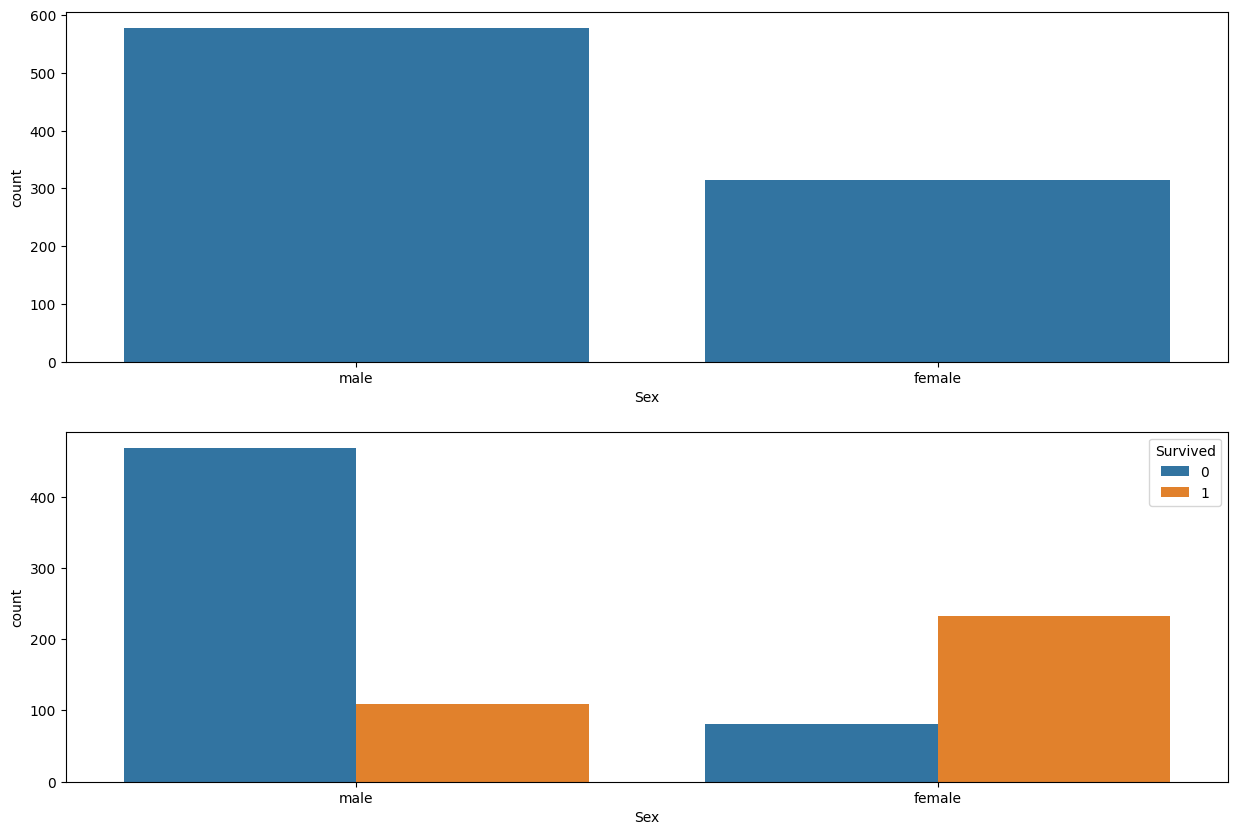

In [ ]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.countplot(x='Sex',data=titanic_df)

plt.subplot(212)
sns.countplot(x='Sex',hue='Survived',data=titanic_df)

<Axes: >

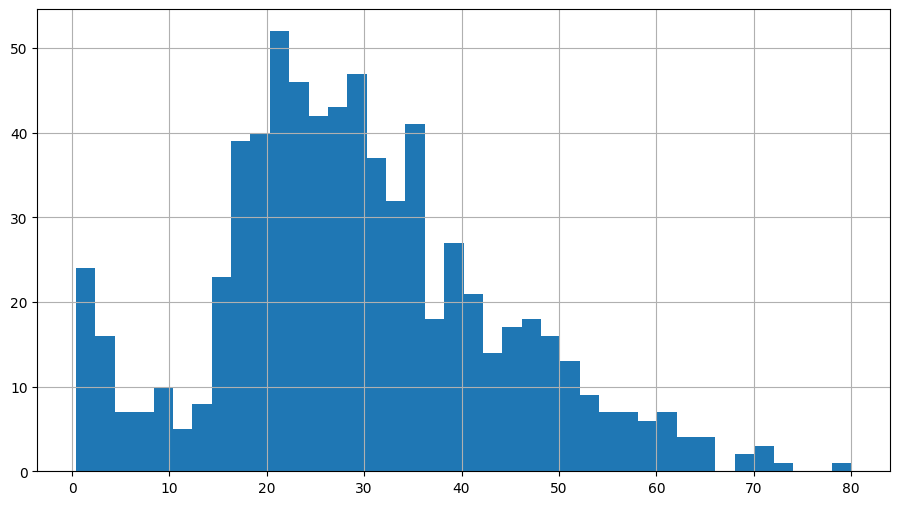

In [ ]:
plt.figure(figsize=[11,6])
titanic_df['Age'].hist(bins=40)

<Axes: >

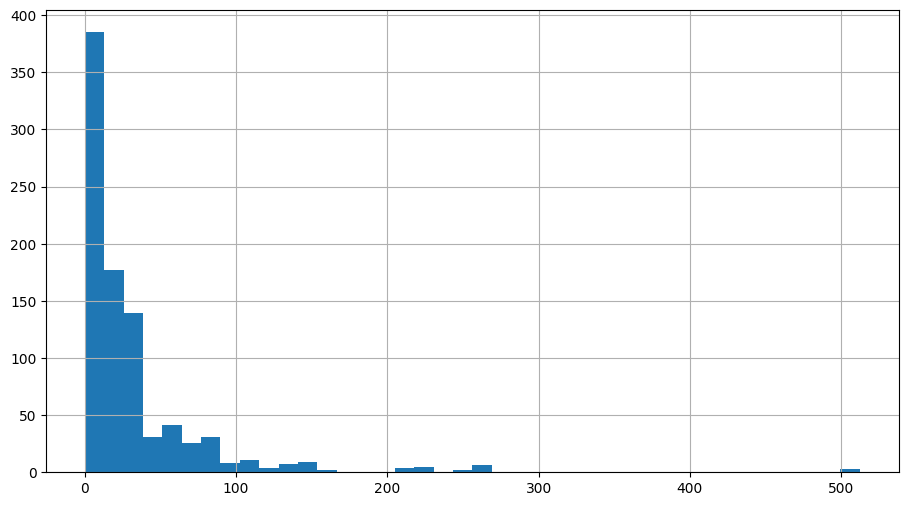

In [ ]:
plt.figure(figsize=[11,6])
titanic_df['Fare'].hist(bins=40)

<Axes: >

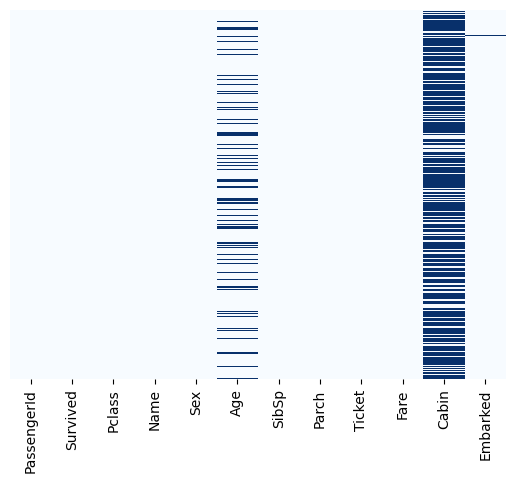

In [ ]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [ ]:
titanic_df.drop('Cabin',axis=1,inplace=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic_df.drop(['Name','Ticket','Embarked','PassengerId'],axis=1,inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


<Axes: >

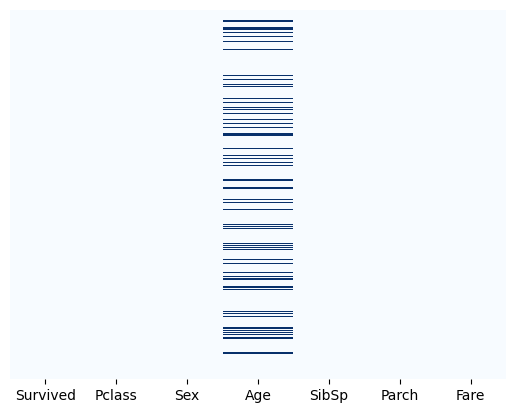

In [ ]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

<Axes: xlabel='Sex', ylabel='Age'>

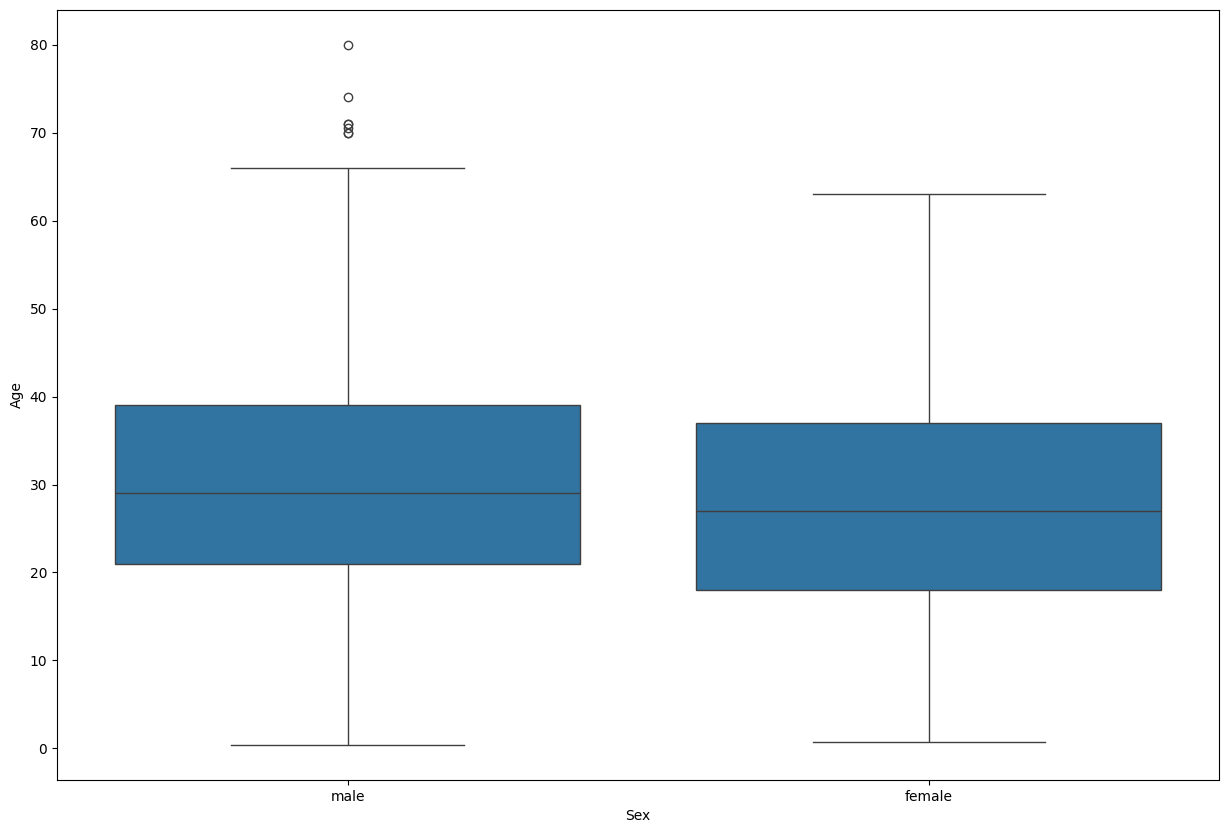

In [ ]:
plt.figure(figsize=[15,10])
sns.boxplot(x='Sex',y='Age',data=titanic_df)

In [ ]:
def fill_age(data):
  age=data[0]
  sex=data[1]
  if pd.isnull(age):
    if sex == 'male':
      return 29
    else:
      return 25
  else:
    return age

In [ ]:
titanic_df['Age']=titanic_df[['Age','Sex']].apply(fill_age,axis=1)

/tmp/ipython-input-745972909.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=data[0]
/tmp/ipython-input-745972909.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sex=data[1]


<Axes: >

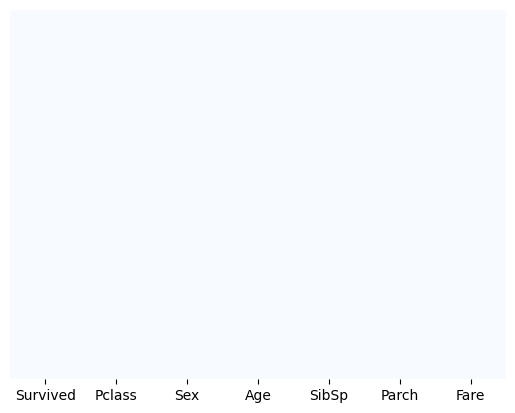

In [ ]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [ ]:
male=pd.get_dummies(titanic_df['Sex'],drop_first=True)

In [ ]:
titanic_df.drop('Sex',axis=1,inplace=True)

In [ ]:
titanic_df=pd.concat([titanic_df,male],axis=1)

In [ ]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True


In [ ]:
X=titanic_df.drop('Survived',axis=1)
y=titanic_df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[99, 18],
       [17, 45]])

<Axes: >

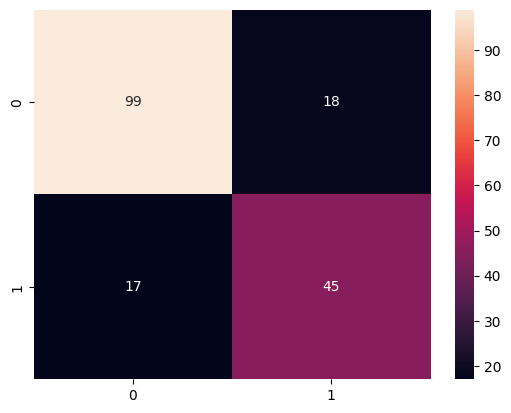

In [ ]:
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179



In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[105,  12],
       [ 29,  33]])

<Axes: >

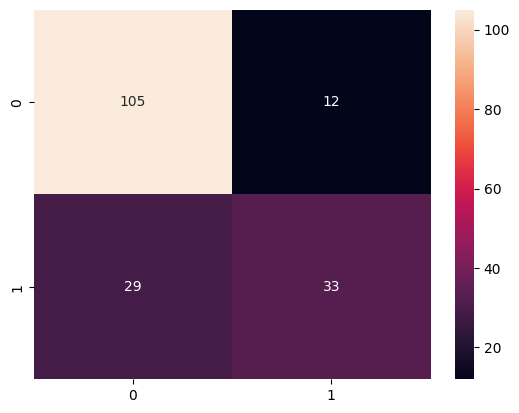

In [ ]:
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       117
           1       0.73      0.53      0.62        62

    accuracy                           0.77       179
   macro avg       0.76      0.71      0.73       179
weighted avg       0.77      0.77      0.76       179

